In [1]:
%matplotlib inline

import os

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
path_img = 'train/images/'
path_mask = 'train/masks/'

In [3]:
files = []
for _, _, arquivo in os.walk(path_img):
    files.append(arquivo)
files = files[0]

In [4]:
len(files)

4000

In [241]:
def magnitude_spectrum(img):
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft = np.fft.fftshift(dft) # coloca origem no centro da imagem (ao invés do canto superior esquerdo)
    mag = np.log(cv2.magnitude(dft[:,:,0],dft[:,:,1])+1e-6) # log facilita visualização: decaimento exponencial
    return mag

In [240]:
v_idx = [49,59,73]

In [292]:
def plot_espectrum(idx):
    img_r = cv2.imread(path_img + files[idx],0)
    mask = cv2.imread(path_mask + files[idx],0)
    
    com_sal = img_r[:41,60:]
    sem_sal = img_r[60:,:41]
    
    hist_full = cv2.calcHist([com_sal],[0],None,[256],[0,256])
    hist_full_inv = cv2.calcHist([sem_sal],[0],None,[256],[0,256])
    
    mag_com_sal = magnitude_spectrum(com_sal)
    mag_sem_sal = magnitude_spectrum(sem_sal)
    
    plt.figure(1,figsize=(8,8))
    plt.subplot(131,title='Imagem'), plt.imshow(img_r, 'gray')
    plt.subplot(132,title='Área com sal'), plt.imshow(com_sal, 'gray')
    plt.subplot(133,title='Espectro'), plt.imshow(mag_com_sal,'gray')
    plt.show()
    
    plt.figure(2,figsize=(8,8))
    plt.subplot(131,title='Máscara'), plt.imshow(mask,'gray')
    plt.subplot(132,title='Área sem sal'), plt.imshow(sem_sal, 'gray')
    plt.subplot(133,title='Espectro'), plt.imshow(mag_sem_sal,'gray')
    plt.show()
    
    plt.figure(3,figsize=(8,8))
    plt.subplot(111,title='Histograma'), plt.plot(hist_full), plt.plot(hist_full_inv)
    plt.show()

File:  68b593f903.png


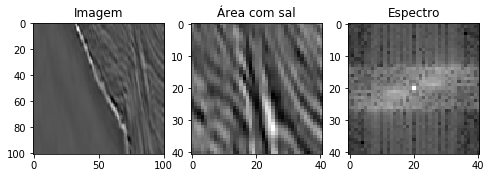

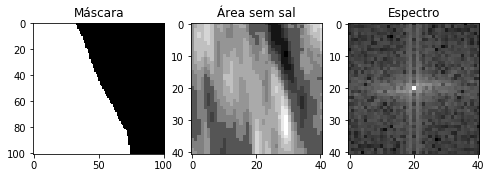

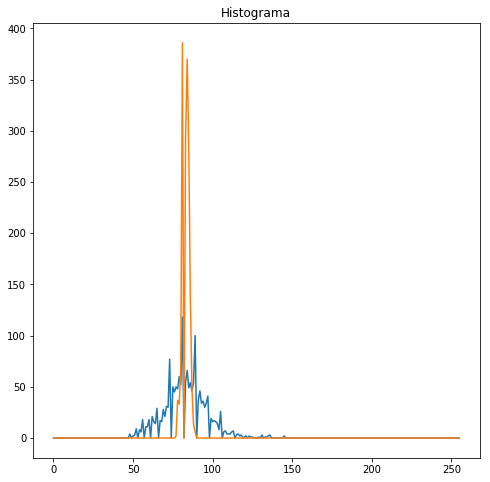

File:  52ac7bb4c1.png


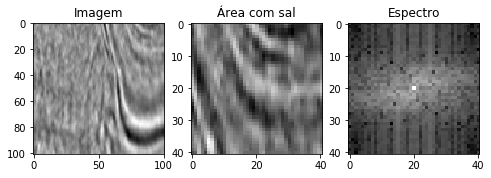

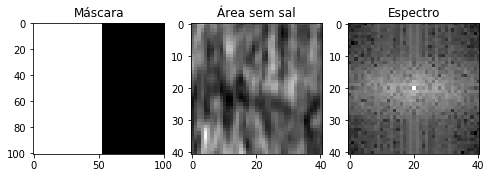

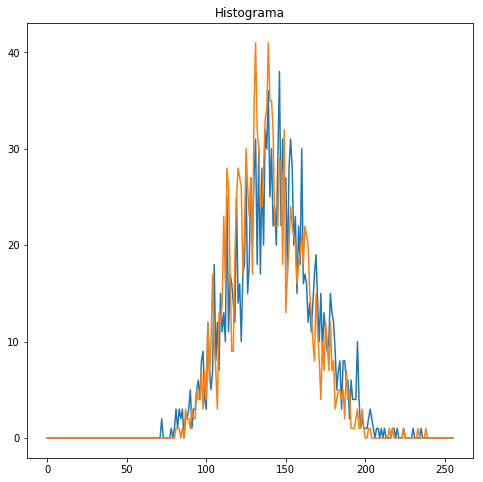

File:  3f2865df45.png


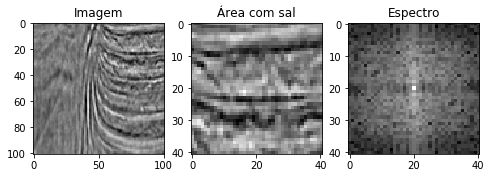

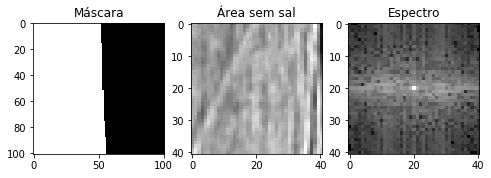

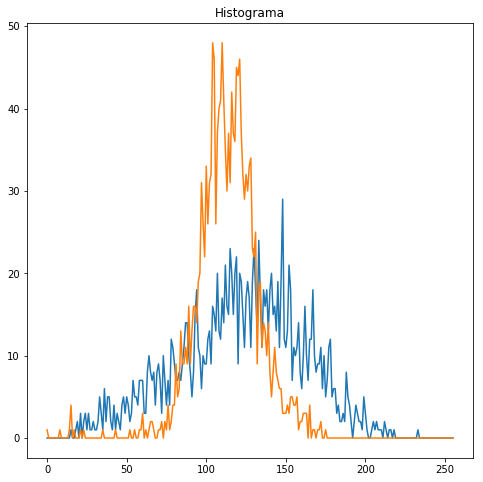

In [294]:
for i in v_idx:
    print('File: ', files[i])
    plot_espectrum(i)